# A/B Testing Analysis

![AB Testing Analysis](ab-testing.png)

# 1. Import Necessary Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 2 Load Dataset
For demonstration purposes, I'll load Dataset in this section.

In [2]:
dataset = pd.read_csv("ecommerce_product_dataset.csv")
dataset2 = pd.read_csv("ecommerce_product_dataset2.csv")

In [3]:
dataset.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [4]:
dataset2.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City,Stock In Vast or Limited Quantity
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,11/10/2023,Albuquerque,True
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,9/28/2023,Queens,True
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,10/20/2023,Austin,True
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,12/5/2023,Dallas,True
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,8/10/2023,Tucson,True


In [5]:
dataset2.drop(columns=['Stock In Vast or Limited Quantity'], inplace=True)

In [6]:
dataset2.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,11/10/2023,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,9/28/2023,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,10/20/2023,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,12/5/2023,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,8/10/2023,Tucson


In [7]:
# Convert 'Date' column to datetime format
dataset2['DateAdded'] = pd.to_datetime(dataset2['DateAdded'])

# Format 'Date' column as desired (e.g., DD-MM-YYYY)
dataset2['DateAdded'] = dataset2['DateAdded'].dt.strftime('%d-%m-%Y')

### Now both dataset format are same dataset and dataset2
# Merge Both dataset

In [8]:
dataset3 = pd.concat([dataset, dataset2], ignore_index=True)

In [9]:
dataset3

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson
...,...,...,...,...,...,...,...,...,...,...,...
1995,996,Throw Blanket,Blankets,207.72,2.3,1973,16,0.46,325,13-02-2024,Baton Rouge
1996,997,Fleece Blanket,Blankets,268.60,3.2,841,201,0.39,1546,01-07-2023,Worcester
1997,998,Throw Blanket,Blankets,92.74,2.8,3454,880,0.02,1295,29-10-2023,Raleigh
1998,999,Weighted Blanket,Blankets,152.28,1.3,2850,752,0.34,1962,28-10-2023,Nashville


In [10]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      2000 non-null   int64  
 1   ProductName    2000 non-null   object 
 2   Category       2000 non-null   object 
 3   Price          2000 non-null   float64
 4   Rating         2000 non-null   float64
 5   NumReviews     2000 non-null   int64  
 6   StockQuantity  2000 non-null   int64  
 7   Discount       2000 non-null   float64
 8   Sales          2000 non-null   int64  
 9   DateAdded      2000 non-null   object 
 10  City           2000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 172.0+ KB


In [11]:
dataset3.describe()

,ProductID,Price,Rating,NumReviews,StockQuantity,Discount,Sales
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,500.500000,253.775510,3.025600,2498.753000,495.395000,0.251640,1011.037000
std,288.747186,141.368247,1.150716,1462.875832,292.726007,0.146418,581.967847
min,1.000000,10.110000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,250.750000,133.092500,2.100000,1201.750000,241.750000,0.130000,502.000000
50%,500.500000,251.310000,3.100000,2476.000000,505.000000,0.250000,998.000000
75%,750.250000,375.827500,4.000000,3797.500000,743.500000,0.380000,1540.000000
max,1000.000000,499.740000,5.000000,4994.000000,993.000000,0.500000,1997.000000


# Check Null Values

In [12]:
dataset3.isna().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64

In [13]:
dataset3.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [14]:
# Example: If 'Category' is a categorical column, handle it separately
categories = dataset3['Category']  # Store categories for later use

# Remove or convert categorical columns if not needed for numerical analysis
graphsdata = dataset3.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns for analysis

## Correlation Matrix

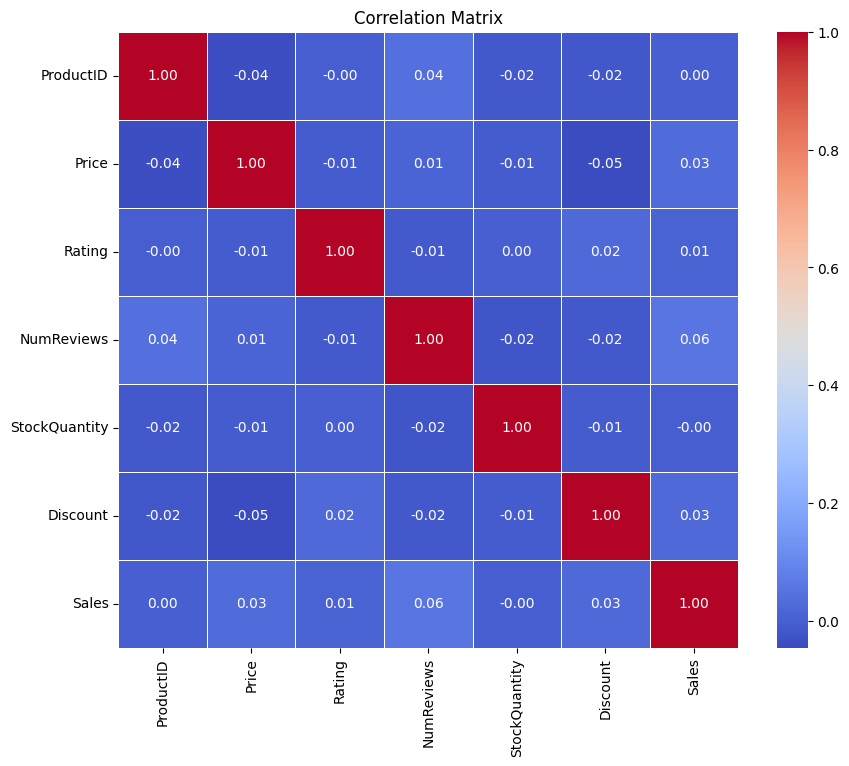

In [15]:
# Calculate correlation matrix
correlation_matrix = graphsdata.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

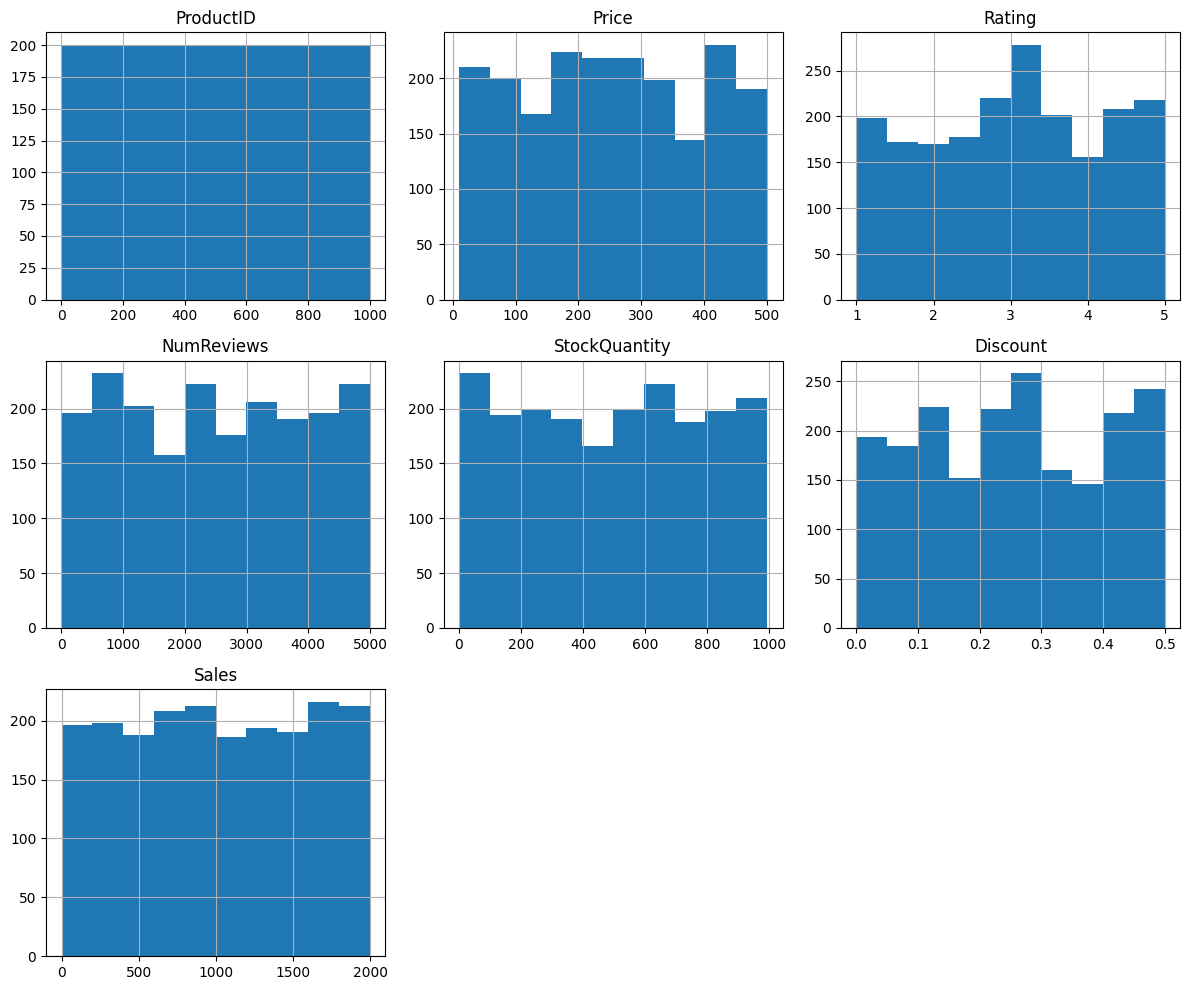

In [16]:
graphsdata.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

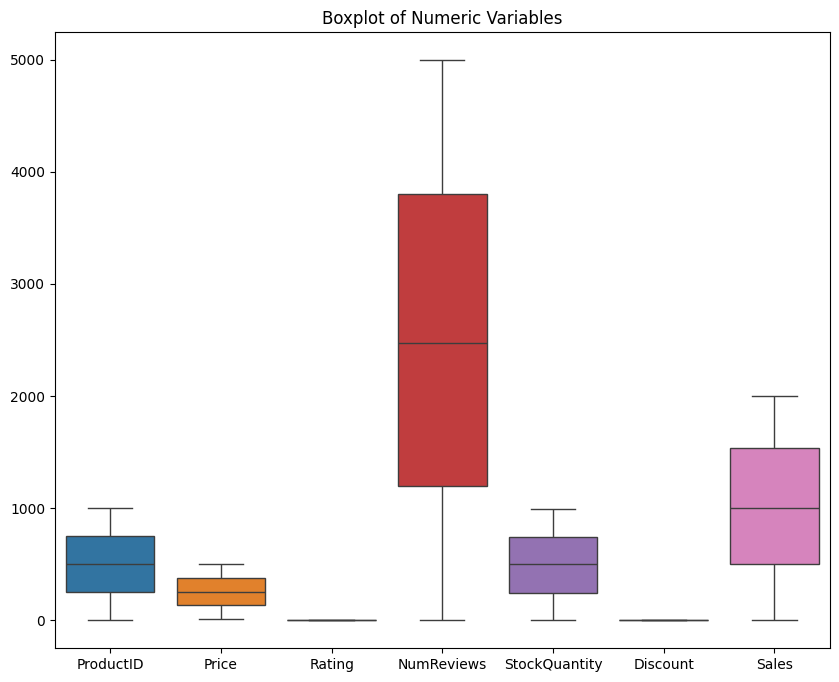

In [17]:
# Plot boxplots to visualize distributions and outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=graphsdata)
plt.title('Boxplot of Numeric Variables')
plt.show()

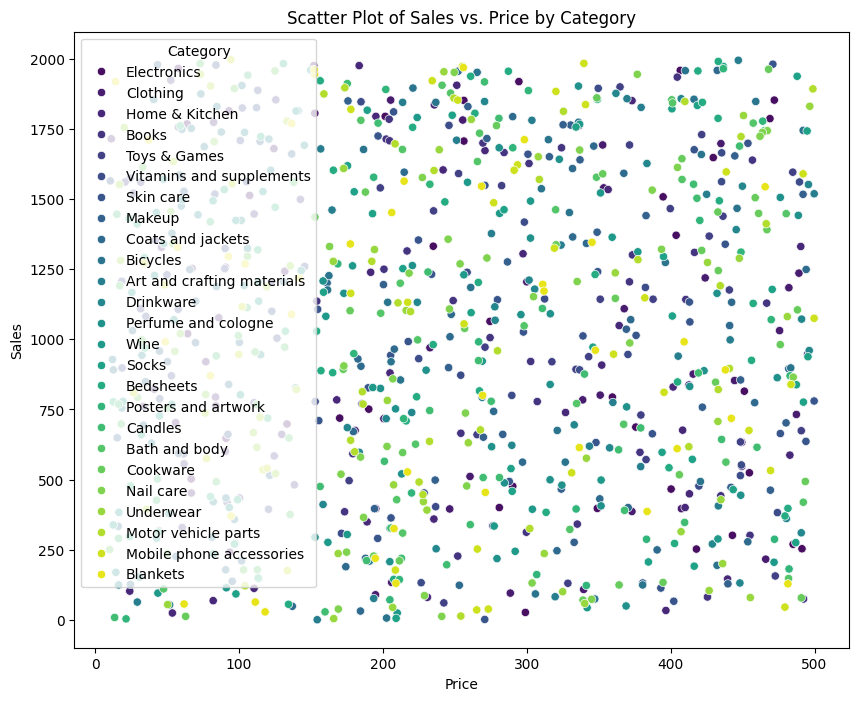

In [18]:
# Example scatter plot to explore relationships between variables
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Price', y='Sales', data=graphsdata, hue=categories, palette='viridis')
plt.title('Scatter Plot of Sales vs. Price by Category')
plt.show()

# A/B Testing Analysis (Product Discount and Sales)

# 3. Define Control and Variation Groups
Let's use Discount as our intervention.

- Control Group (A): Products without a discount (Discount == 0)
- Variation Group (B): Products with a discount (Discount > 0)

In [19]:
control_group = dataset3[dataset3['Discount'] == 0]['Sales']
variation_group = dataset3[dataset3['Discount'] > 0]['Sales']

# 4. Conduct T-test
Now, perform a T-test to compare the mean Sales between the control and variation groups.

In [20]:
t_stat, p_value = ttest_ind(control_group, variation_group)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -1.437561561558429
P-value: 0.15071508364343686


# 5. Interpret Results

In [21]:
alpha = 0.05  # significance level

if p_value < alpha:
    print("\nReject the null hypothesis \n\nThere is a significant difference between groups.")
else:
    print("\nFail to reject the null hypothesis \n\nThere is no significant difference between groups.")



Fail to reject the null hypothesis 

There is no significant difference between groups.


# Explanation of A/B Testing Results
## T-Test Results

- T-statistic: -1.437561561558429
- P-value: 0.15071508364343686

## Interpretation

Based on the results of the T-test

- The P-value is 0.15071508364343686, which is greater than the commonly used significance level of 0.05.
- Therefore, we fail to reject the null hypothesis.

## Conclusion:

There is no significant difference between the groups. This means that, based on the given data, the two groups being compared do not show a statistically significant difference in their means. Any observed differences are likely due to random variation rather than a specific effect or intervention.

# 6. Visualize Results
I can visualize the distribution of Sales in both groups

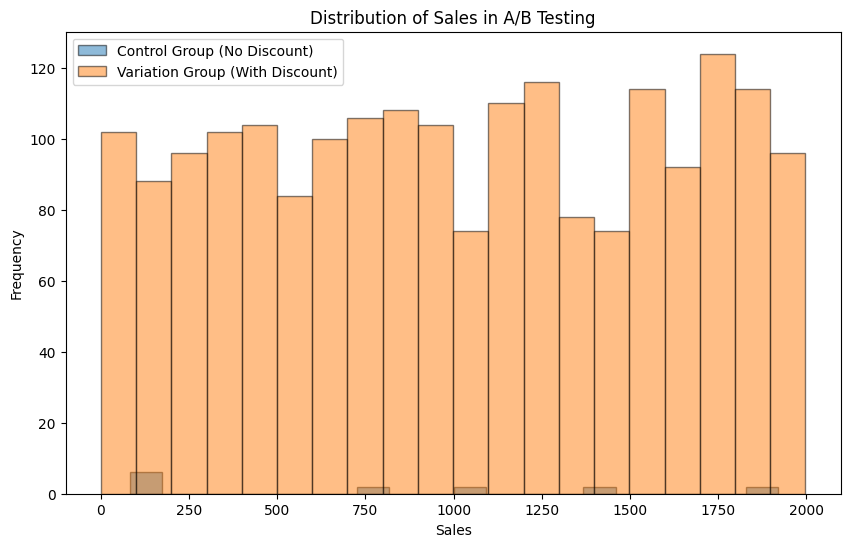

In [22]:
plt.figure(figsize=(10, 6))

plt.hist(control_group, bins=20,edgecolor='k', alpha=0.5, label='Control Group (No Discount)')
plt.hist(variation_group, bins=20,edgecolor='k', alpha=0.5, label='Variation Group (With Discount)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales in A/B Testing')
plt.legend()

plt.show()

# A/B Testing Analysis (City and Sales)

In [23]:
df = dataset2

# Create a contingency table
contingency_table = pd.crosstab(df['City'], df['Sales'])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")

alpha = 0.05  # significance level

if p_value < alpha:
    print("\nReject the null hypothesis: \n\nThere is a significant association between Category and Outcome.")
else:
    print("\nFail to reject the null hypothesis: \n\nThere is no significant association between Category and Outcome.")

Chi-Square Statistic: 76937.45494701377
P-value: 0.1317932541858378

Fail to reject the null hypothesis: 

There is no significant association between Category and Outcome.


## Explanation

### Chi-Square Test Results

- Chi-Square Statistic: 76937.45494701377
- P-value: 0.1317932541858378

### Interpretation

Based on the results of the Chi-Square test

- The P-value is 0.1317932541858378, which is greater than the commonly used significance level of 0.05.
- Therefore, we fail to reject the null hypothesis.

### Conclusion

There is no significant association between City and Sales. This means that, based on the given data, the sales figures do not significantly vary across different cities. Any observed differences in sales among cities are likely due to random variation rather than a specific underlying pattern or cause.

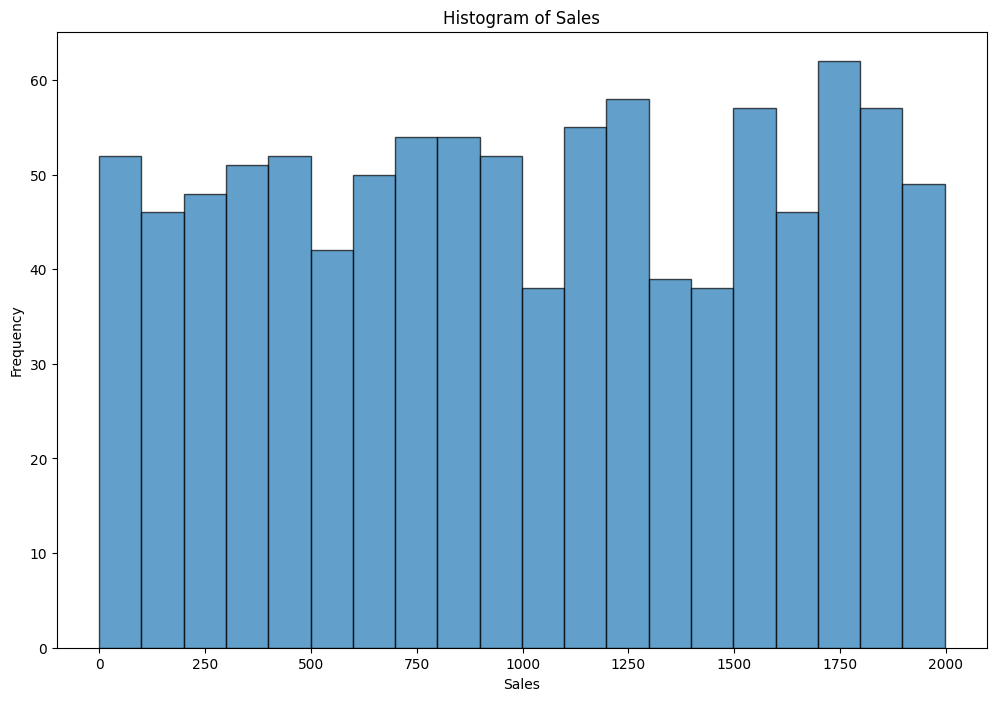

In [27]:
# Plotting a simple histogram for Sales
plt.figure(figsize=(12, 8))
plt.hist(df['Sales'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()